In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('peak.csv')

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M:%S")

df["Observed State"] = df["Observed State"].str.capitalize()

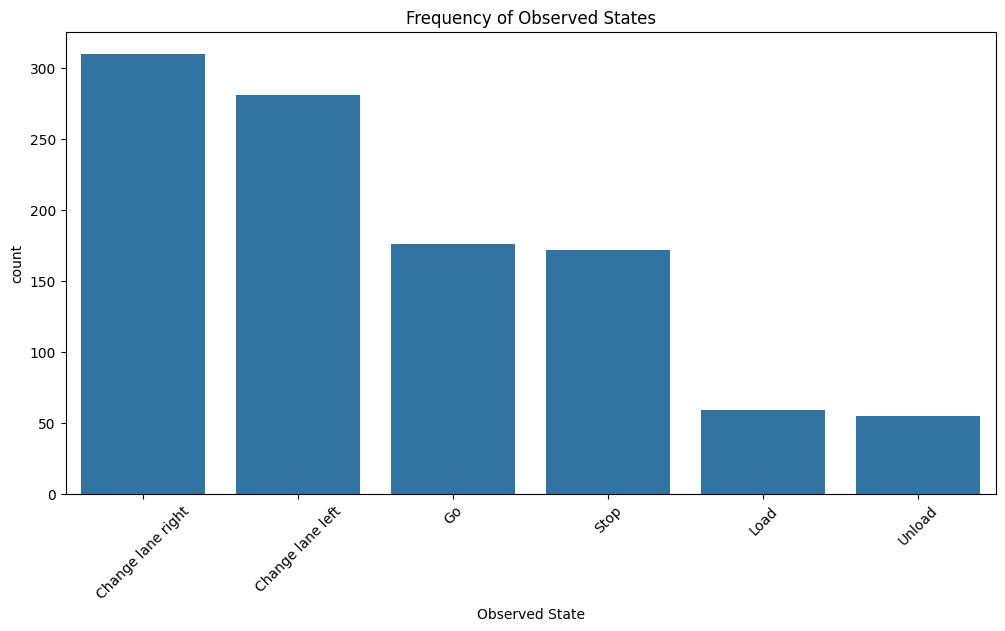

Observed State
Change lane right    310
Change lane left     281
Go                   176
Stop                 172
Load                  59
Unload                55
Name: count, dtype: int64


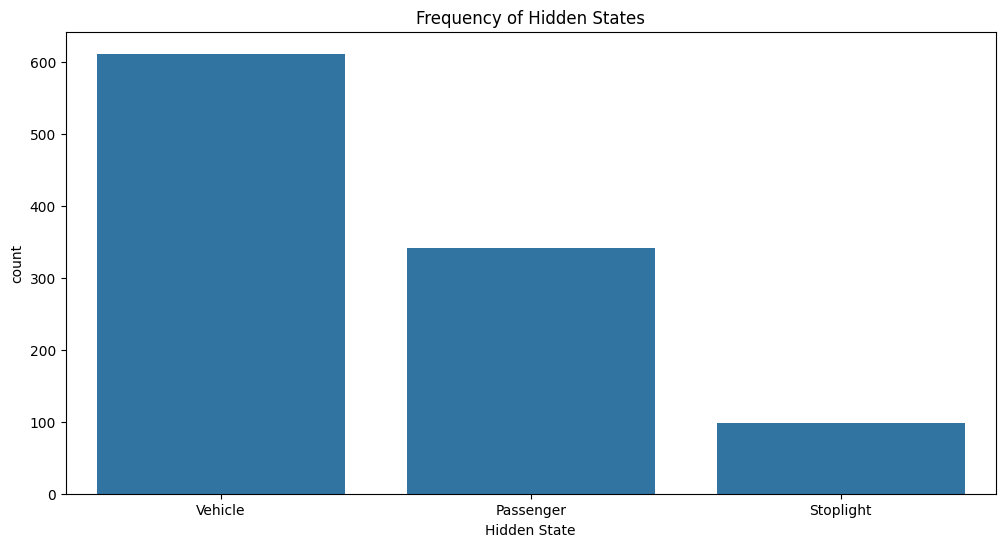

Hidden State Counts:
 Hidden State
Vehicle      612
Passenger    342
Stoplight     99
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Observed State", order=df["Observed State"].value_counts().index)
plt.title("Frequency of Observed States")
plt.xticks(rotation=45)
plt.show()
state_counts = df["Observed State"].value_counts()
print(state_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hidden State", order=df["Hidden State"].value_counts().index)
plt.title("Frequency of Hidden States")
plt.show()
hidden_state_counts = df["Hidden State"].value_counts()
print("Hidden State Counts:\n", hidden_state_counts)

# # Duration of each state
# plt.figure(figsize=(12, 6))
# state_duration.plot(kind='bar')
# plt.title("Duration of Each Observed State")
# plt.ylabel("Duration (seconds)")
# plt.show()


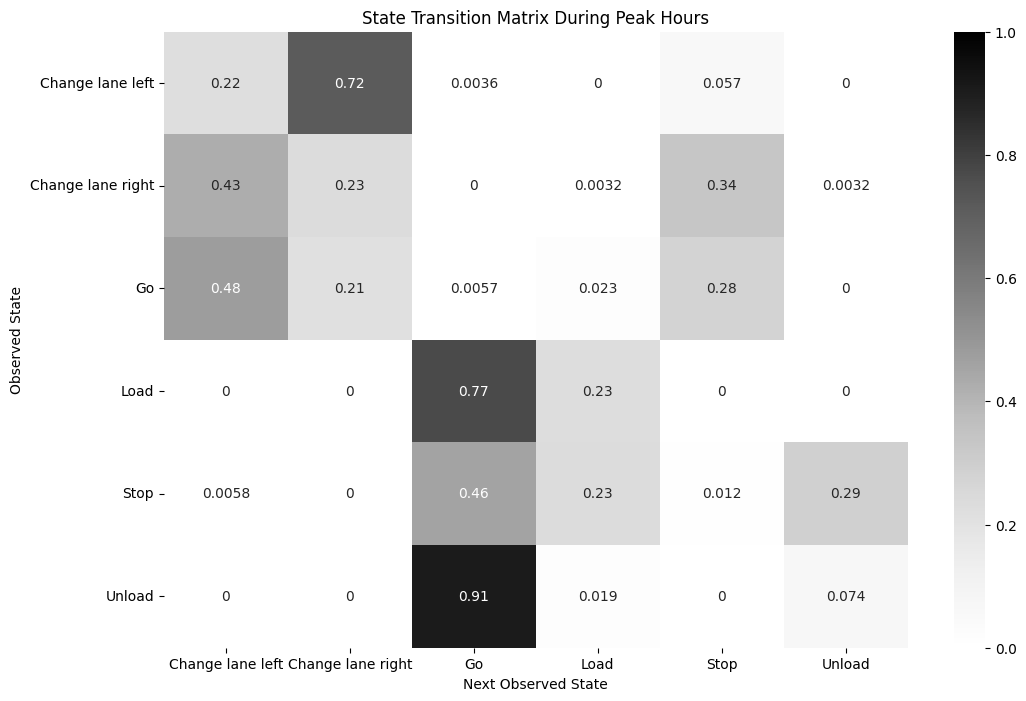

In [26]:
df["Next Observed State"] = df["Observed State"].shift(-1)

df = df.dropna()

transition_matrix = pd.crosstab(df["Observed State"], df["Next Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("State Transition Matrix During Peak Hours")
plt.show()

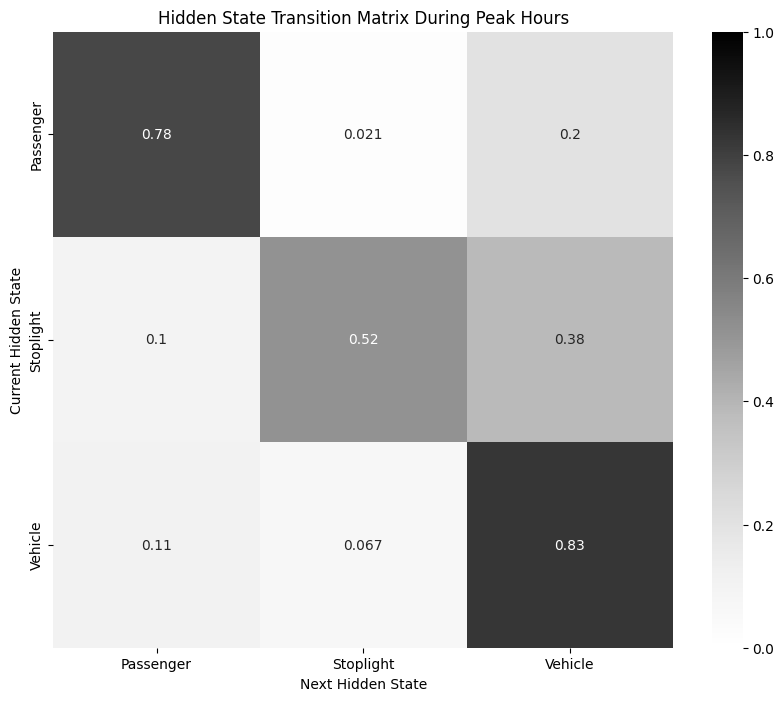

In [27]:
df["Next Hidden State"] = df["Hidden State"].shift(-1)

df = df.dropna()

hidden_state_transition_matrix = pd.crosstab(df["Hidden State"], df["Next Hidden State"], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(hidden_state_transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State Transition Matrix During Peak Hours")
plt.xlabel("Next Hidden State")
plt.ylabel("Current Hidden State")
plt.show()

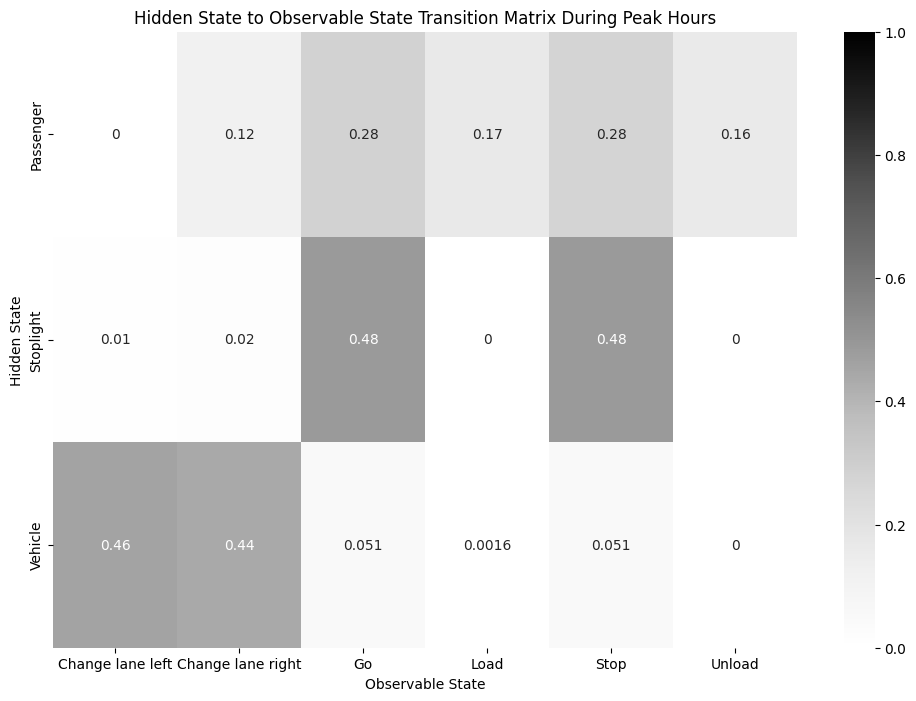

In [28]:
hidden_to_observed_matrix = pd.crosstab(df["Hidden State"], df["Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(hidden_to_observed_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State to Observable State Transition Matrix During Peak Hours")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()

In [29]:
df = pd.read_csv('non_peak.csv')

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M:%S")

df["Observed State"] = df["Observed State"].str.capitalize()

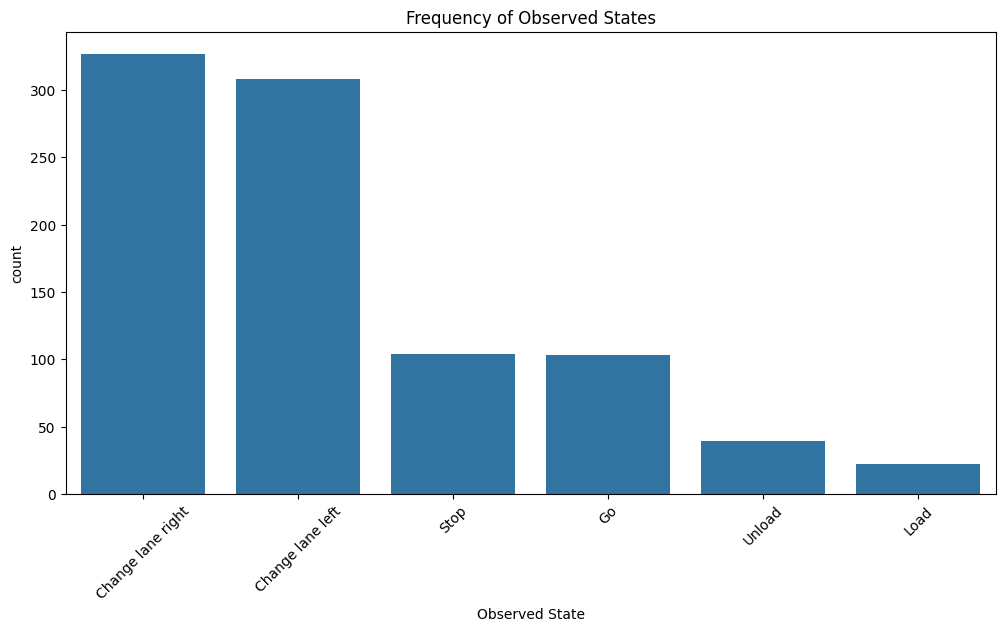

Observed State
Change lane right    327
Change lane left     308
Stop                 104
Go                   103
Unload                39
Load                  22
Name: count, dtype: int64


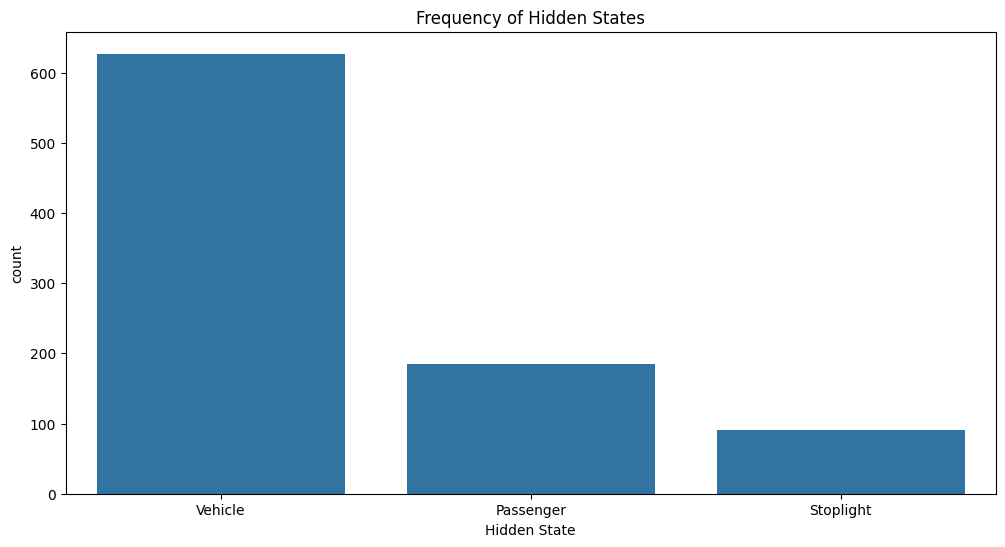

Hidden State Counts:
 Hidden State
Vehicle      627
Passenger    185
Stoplight     91
Name: count, dtype: int64


In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Observed State", order=df["Observed State"].value_counts().index)
plt.title("Frequency of Observed States")
plt.xticks(rotation=45)
plt.show()
state_counts = df["Observed State"].value_counts()
print(state_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hidden State", order=df["Hidden State"].value_counts().index)
plt.title("Frequency of Hidden States")
plt.show()
hidden_state_counts = df["Hidden State"].value_counts()
print("Hidden State Counts:\n", hidden_state_counts)

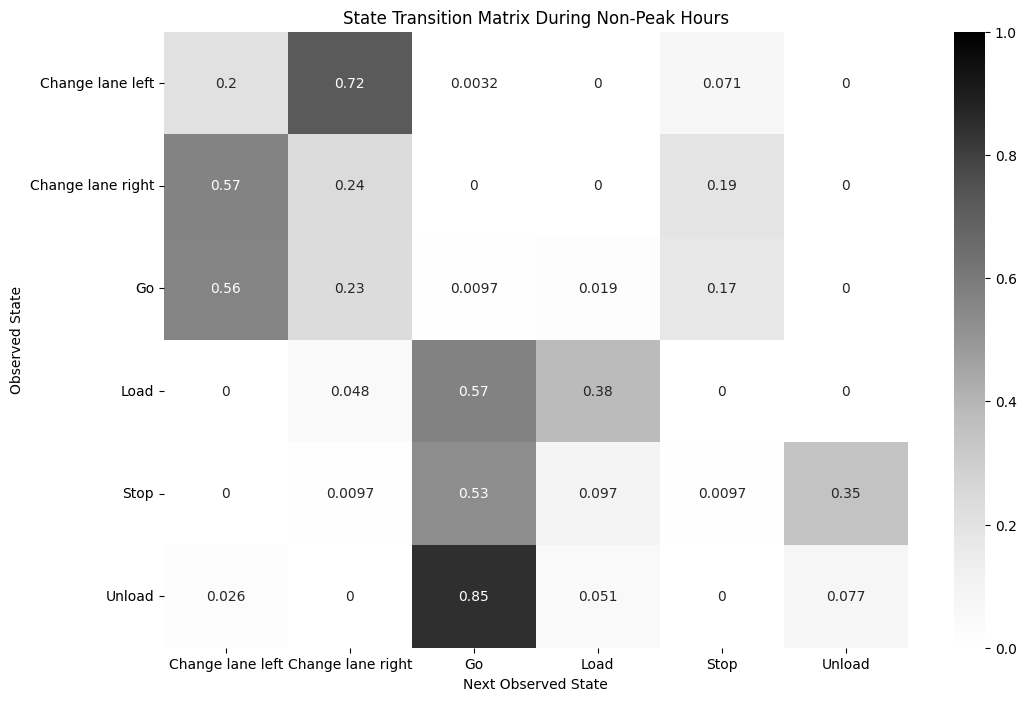

In [31]:
df["Next Observed State"] = df["Observed State"].shift(-1)

df = df.dropna()

transition_matrix = pd.crosstab(df["Observed State"], df["Next Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("State Transition Matrix During Non-Peak Hours")
plt.show()

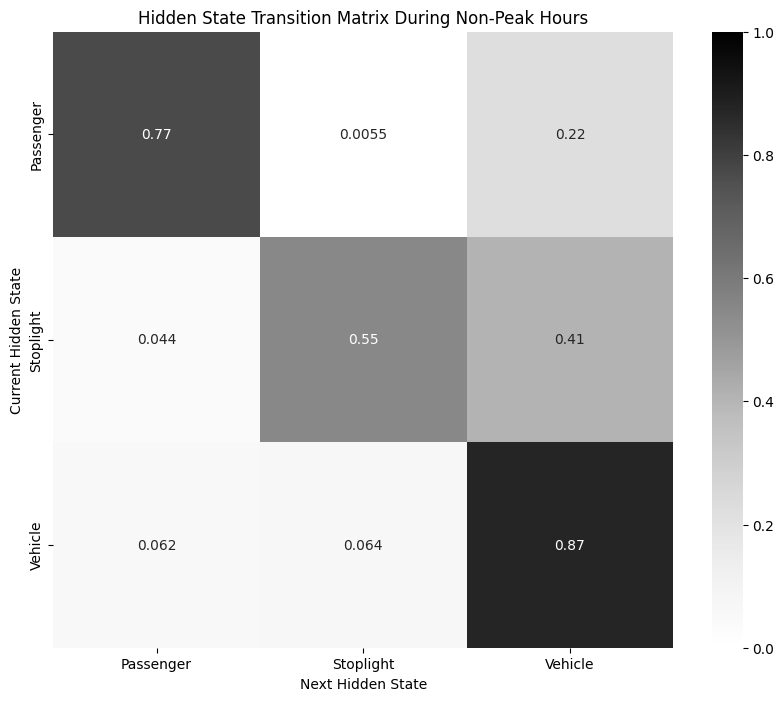

In [32]:
df["Next Hidden State"] = df["Hidden State"].shift(-1)

df = df.dropna()

hidden_state_transition_matrix = pd.crosstab(df["Hidden State"], df["Next Hidden State"], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(hidden_state_transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State Transition Matrix During Non-Peak Hours")
plt.xlabel("Next Hidden State")
plt.ylabel("Current Hidden State")
plt.show()

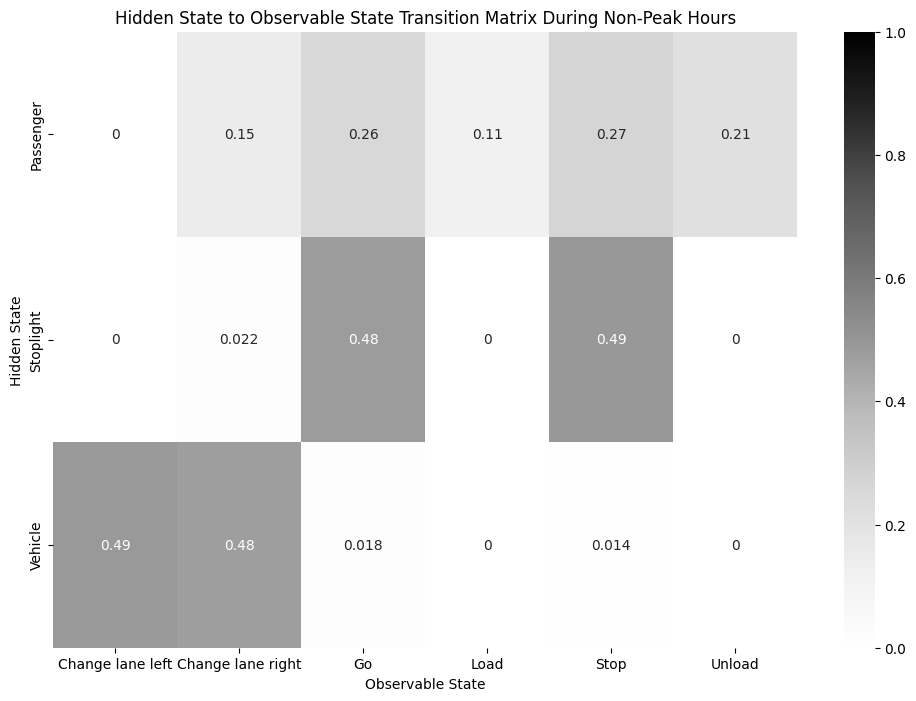

In [33]:
hidden_to_observed_matrix = pd.crosstab(df["Hidden State"], df["Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(hidden_to_observed_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State to Observable State Transition Matrix During Non-Peak Hours")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()